<a target="_blank" href="https://colab.research.google.com/github/Dr-Isam-ALJAWARNEH/ds-project-lstm-forecasting/blob/main/Project01_LSTM.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from IPython.display import Image
import folium
from folium import IFrame
from folium.plugins import MarkerCluster
from folium import plugins
from datetime import datetime
import datetime as dt
import json
from scipy import stats

import os

In [3]:
path="/content/drive/MyDrive/smart_parking/data/"

In [4]:
NYC_PM = pd.read_csv(path + "NYC_PM.csv")
#NYC_PM = pd.read_csv("https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_AQ.csv")
NYC_PM.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,0,0,0,23.7,57.3,4.508813
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,0,0,0,23.7,57.8,5.462420
2,NYCP2_CS01A,1631277313,40.847649,-73.869362,40,1,1,0,0,1,...,0,0,0,0,0,0,0,23.7,57.8,5.154881
3,NYCP2_CS01A,1631277318,40.847649,-73.869362,26,1,0,0,0,0,...,0,0,0,0,0,0,0,23.6,57.6,4.508813
4,NYCP2_CS01A,1631277323,40.847649,-73.869362,44,4,0,1,0,0,...,0,0,0,0,0,0,0,23.6,57.5,5.539503


In [ ]:
NYC_PM.shape

(118765, 33)

In [ ]:
NYC_PM.dtypes

SensorID        object
time             int64
latitude       float64
longitude      float64
bin0             int64
bin1             int64
bin2             int64
bin3             int64
bin4             int64
bin5             int64
bin6             int64
bin7             int64
bin8             int64
bin9             int64
bin10            int64
bin11            int64
bin12          float64
bin13          float64
bin14          float64
bin15          float64
bin16          float64
bin17          float64
bin18          float64
bin19          float64
bin20          float64
bin21          float64
bin22          float64
bin23          float64
temperature    float64
humidity       float64
pm1            float64
pm25           float64
pm10           float64
dtype: object

In [ ]:
NYC_PM.describe()

,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
count,1.699990e+05,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,...,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000
mean,1.634506e+09,40.826202,-73.892555,78.485926,8.056747,1.885382,0.551209,0.806628,0.578003,0.367173,...,0.000247,0.000159,0.000118,0.000059,0.000065,0.000047,0.000141,17.432182,56.241018,4.310939
std,2.197971e+06,0.017215,0.019362,148.612154,22.639578,4.616222,1.461197,1.969984,1.535912,1.020670,...,0.016086,0.012602,0.010846,0.007669,0.008044,0.006860,0.012366,6.659859,16.583384,1.794719
min,1.631277e+09,40.711689,-73.934052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.000000,0.000000,1.568473
25%,1.632808e+09,40.813564,-73.911232,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.400000,42.200000,3.162405
50%,1.633554e+09,40.818981,-73.892303,39.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.400000,55.300000,4.251249
75%,1.636266e+09,40.845383,-73.870804,92.000000,9.000000,2.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.600000,69.000000,4.786389
max,1.639579e+09,40.904430,-73.820808,6233.000000,2493.000000,305.000000,106.000000,101.000000,92.000000,59.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,32.400000,100.000000,12.744419


In [ ]:
NYC_PM.isnull().sum()

SensorID       0
time           0
latitude       0
longitude      0
bin0           0
bin1           0
bin2           0
bin3           0
bin4           0
bin5           0
bin6           0
bin7           0
bin8           0
bin9           0
bin10          0
bin11          0
bin12          0
bin13          0
bin14          0
bin15          0
bin16          0
bin17          0
bin18          0
bin19          0
bin20          0
bin21          0
bin22          0
bin23          0
temperature    0
humidity       0
pm25           0
dtype: int64

In [8]:
import pandas as pd
from pandas import read_csv
from datetime import datetime

NYC_PM['time'] = pd.to_datetime(NYC_PM['time'], unit='s')
#NYC_PM.drop("SensorID",axis=1,inplace=True)


# the first 5 rows
print(NYC_PM .head())

      SensorID                time   latitude  longitude  bin0  bin1  bin2  \
0  NYCP2_CS01A 2021-09-10 12:35:04  40.847672 -73.869316    11     1     1   
1  NYCP2_CS01A 2021-09-10 12:35:08  40.847668 -73.869316    22     4     1   
2  NYCP2_CS01A 2021-09-10 12:35:13  40.847649 -73.869362    40     1     1   
3  NYCP2_CS01A 2021-09-10 12:35:18  40.847649 -73.869362    26     1     0   
4  NYCP2_CS01A 2021-09-10 12:35:23  40.847649 -73.869362    44     4     0   

   bin3  bin4  bin5  ...  bin17  bin18  bin19  bin20  bin21  bin22  bin23  \
0     0     0     0  ...      0      0      0      0      0      0      0   
1     0     0     2  ...      0      0      0      0      0      0      0   
2     0     0     1  ...      0      0      0      0      0      0      0   
3     0     0     0  ...      0      0      0      0      0      0      0   
4     1     0     0  ...      0      0      0      0      0      0      0   

   temperature  humidity      pm25  
0         23.7      57.3  4.508

In [ ]:
print(NYC_PM.columns)

Index(['SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm1', 'pm25', 'pm10'],
      dtype='object')


In [9]:
NYC_PM=NYC_PM.drop(columns=['SensorID', 'bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18', 'bin19', 'bin20', 'bin21', 'bin22', 'bin23'])

# manually specify column names
NYC_PM.columns = ['time', 'latitude', 'longitude', 'temperature', 'humidity', 'pollution']
NYC_PM.set_index('time', inplace=True)
NYC_PM.index.name = 'date'

print(NYC_PM .head())
# save to file
NYC_PM.to_csv('NYC_PM_edited.csv')

                      latitude  longitude  temperature  humidity  pollution
date                                                                       
2021-09-10 12:35:04  40.847672 -73.869316         23.7      57.3   4.508813
2021-09-10 12:35:08  40.847668 -73.869316         23.7      57.8   5.462420
2021-09-10 12:35:13  40.847649 -73.869362         23.7      57.8   5.154881
2021-09-10 12:35:18  40.847649 -73.869362         23.6      57.6   4.508813
2021-09-10 12:35:23  40.847649 -73.869362         23.6      57.5   5.539503


In [10]:
!pip install geohash2

  Preparing metadata (setup.py) ... done
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15544 sha256=7cbca2ef040b97636ad0bdf4d81d6359e0b4255405da46bf6eb4fa24deb4ee27
  Stored in directory: /root/.cache/pip/wheels/c0/21/8d/fe65503f4f439aef35193e5ec10a14adc945e20ff87eb35895
Successfully built geohash2


In [11]:
import pandas as pd
import numpy as np
import geohash2
from geohash2 import encode

# We want to gain the geohash of the latitude and longitude columns:
def calculate_geohash(row):
    return encode(row['latitude'], row['longitude'], precision=6)
#Adding a geohash column to the table
NYC_PM['geohash'] = NYC_PM.apply(calculate_geohash, axis=1)
print(NYC_PM.head())

#gropuing the data by geohash
grouped_data = NYC_PM.groupby('geohash')

                      latitude  longitude  temperature  humidity  pollution  \
date                                                                          
2021-09-10 12:35:04  40.847672 -73.869316         23.7      57.3   4.508813   
2021-09-10 12:35:08  40.847668 -73.869316         23.7      57.8   5.462420   
2021-09-10 12:35:13  40.847649 -73.869362         23.7      57.8   5.154881   
2021-09-10 12:35:18  40.847649 -73.869362         23.6      57.6   4.508813   
2021-09-10 12:35:23  40.847649 -73.869362         23.6      57.5   5.539503   

                    geohash  
date                         
2021-09-10 12:35:04  dr72rh  
2021-09-10 12:35:08  dr72rh  
2021-09-10 12:35:13  dr72rh  
2021-09-10 12:35:18  dr72rh  
2021-09-10 12:35:23  dr72rh  


In [ ]:
grouped_data.head(20)

,latitude,longitude,temperature,humidity,pollution,geohash
date,,,,,,
2021-09-10 12:35:04,40.847672,-73.869316,23.7,57.3,4.508813,dr72rh
2021-09-10 12:35:08,40.847668,-73.869316,23.7,57.8,5.462420,dr72rh
2021-09-10 12:35:13,40.847649,-73.869362,23.7,57.8,5.154881,dr72rh
2021-09-10 12:35:18,40.847649,-73.869362,23.6,57.6,4.508813,dr72rh
2021-09-10 12:35:23,40.847649,-73.869362,23.6,57.5,5.539503,dr72rh
...,...,...,...,...,...,...
2021-11-11 22:54:37,40.854622,-73.923546,16.0,67.1,2.367734,dr72mv
2021-11-14 01:29:46,40.839794,-73.848595,7.9,56.0,3.464629,dr72rd
2021-11-14 02:04:57,40.860912,-73.845108,7.2,59.1,3.498658,dr72rw


In [12]:
import geopandas as gpd
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
#nyc_map = gpd.read_file(path + "nyc_polygon.geojson")
nyc_map = gpd.read_file("https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson")

In [14]:
from shapely.geometry import Point

#Perform spatial join of NYC Pollution data with NYC Geometry data
NYC_PM['geometry'] = NYC_PM.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
pollution_geo = gpd.GeoDataFrame(NYC_PM, geometry='geometry')

merged_data = gpd.sjoin(nyc_map, pollution_geo, how='right', op='contains')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-14-09adf53c597f>:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  merged_data = gpd.sjoin(nyc_map, pollution_geo, how='right', op='contains')


In [15]:
merged_data = merged_data.drop('index_left', axis=1)

In [16]:
merged_data.head()

,neighborhood,boroughCode,borough,@id,latitude,longitude,temperature,humidity,pollution,geohash,geometry
date,,,,,,,,,,,
2021-09-10 12:35:04,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.847672,-73.869316,23.7,57.3,4.508813,dr72rh,POINT (-73.86932 40.84767)
2021-09-10 12:35:08,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.847668,-73.869316,23.7,57.8,5.462420,dr72rh,POINT (-73.86932 40.84767)
2021-09-10 12:35:13,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.847649,-73.869362,23.7,57.8,5.154881,dr72rh,POINT (-73.86936 40.84765)
2021-09-10 12:35:18,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.847649,-73.869362,23.6,57.6,4.508813,dr72rh,POINT (-73.86936 40.84765)
2021-09-10 12:35:23,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.847649,-73.869362,23.6,57.5,5.539503,dr72rh,POINT (-73.86936 40.84765)


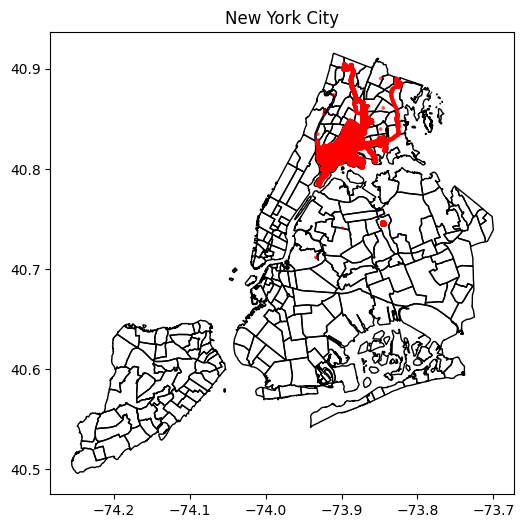

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = nyc_map.plot(ax=ax, facecolor="none", edgecolor="black")
ax.scatter(merged_data['longitude'], merged_data['latitude'], s=merged_data['pollution'], color='red', alpha=0.5)

ax.set_title("New York City")
plt.show()

In [ ]:
print("Areas containing pollution")
print("Latitude range = [" + str(min(NYC_PM['latitude'])) + " -- "  + str(max(NYC_PM['latitude'])) + "]")
print("Longitude range = [" + str(min(NYC_PM['longitude'])) + " -- "  + str(max(NYC_PM['longitude'])) + "]")

Areas containing pollution
Latitude range = [40.711689 -- 40.90443]
Longitude range = [-73.934052 -- -73.820808]


In [ ]:
#Average areas with pollution
print("Average pollution areas:")
print(sum(NYC_PM['latitude'])/ len(NYC_PM))
print(sum(NYC_PM['longitude'])/ len(NYC_PM))

Average pollution areas:
40.82620150788145
-73.89255532637786


In [18]:
merged_data = merged_data.fillna("Unknown")

In [19]:
areas = merged_data['borough'].unique()

In [20]:
#Stratified sampling
groups = []
for area in areas:
  groups.append(merged_data[merged_data['borough'] == area])

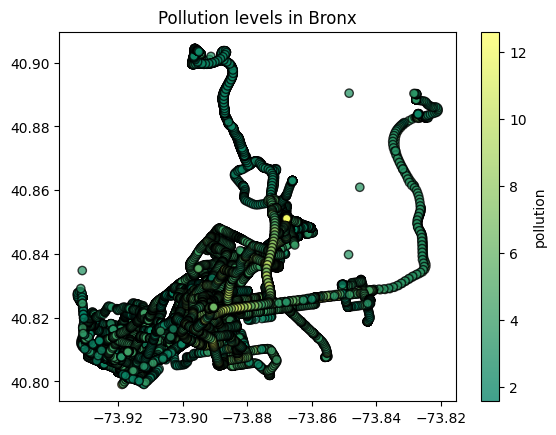

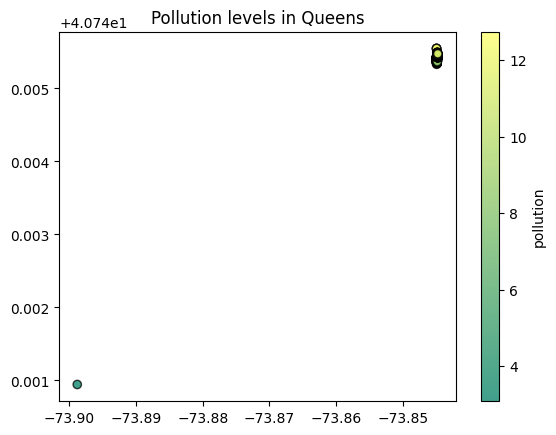

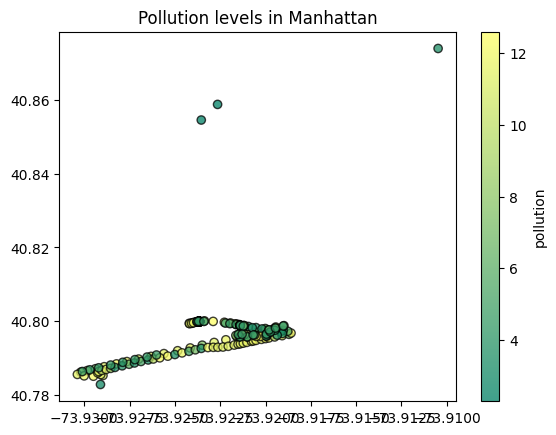

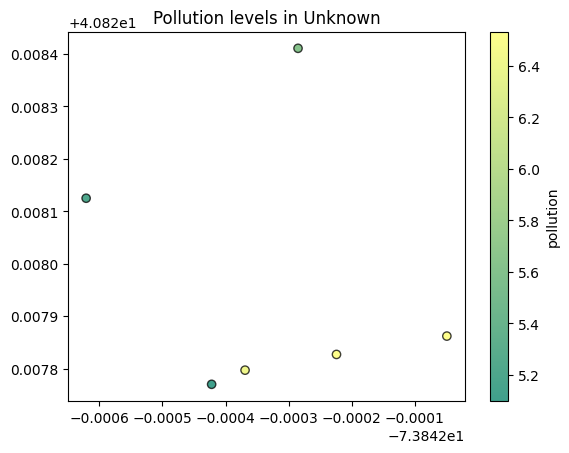

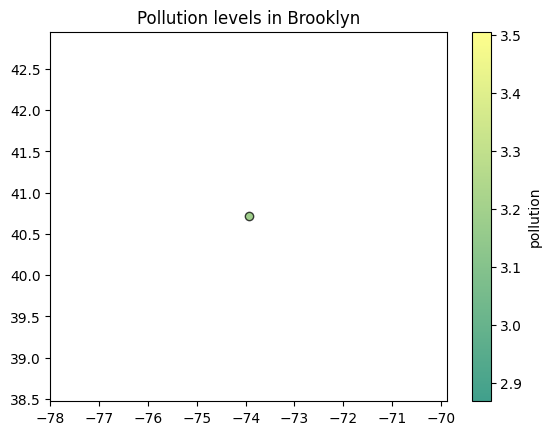

In [21]:
index = 0
for area in areas:
  scatter_plot = plt.scatter(groups[index]['longitude'], groups[index]['latitude'], c=groups[index]['pollution'], cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)
  colorbar = plt.colorbar(scatter_plot, label='pollution')
  plt.title("Pollution levels in " + str(area))
  plt.show()
  index += 1

# feature selection

```TODO```
- develop a method to select features, is there an association between pollution (pm25) and the location expressed as geohash (or on a coarser level any other administrative polygon such as neighborhood)?!
so, imagine, you have a categorical variable (geohash) and a numerical response (pm25), which method you can choose for feature selection.
  > read the following article:
  [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/). Of a specific interest in this case is the ```Categorical Input, Numerical Output``` combination, in which it is recommended to use the same “Numerical Input, Categorical Output” methods <font color='red'> but in reverse </font>

for all methods below, try neighborhood, borough, geohash with different precision to check wether there is an association between any of them and the respone (pollution pm)


In [22]:
# Calculate maximum and minimum pollution values
max_pollution = merged_data['pollution'].max()
min_pollution = merged_data['pollution'].min()

print(f"Maximum pollution value: {max_pollution}")
print(f"Minimum pollution value: {min_pollution}")

Maximum pollution value: 12.74441924
Minimum pollution value: 1.568473024


In [ ]:
import pandas as pd
from scipy.stats import rankdata
'''
if you specifically want a measure similar to Kendall's correlation coefficient but for a
categorical predictor and a continuous outcome, you might consider calculating the correlation between the ranks of the categorical
variable and the continuous variable
'''

# Rank the pollution values
merged_data['pollution_rank'] = rankdata(merged_data['pollution'])

# Calculate the average rank for each category
avg_rank_per_category = merged_data.groupby('geohash')['pollution_rank'].mean()

# Calculate the correlation between the ranks of geohash and pollution
correlation = avg_rank_per_category.corr(merged_data.groupby('geohash').size(), method='kendall')

print(f"Reverse Kendall's correlation coefficient: {correlation}")


Reverse Kendall's correlation coefficient: 0.18607703406282353


In [ ]:
merged_data.head(2)

,neighborhood,boroughCode,borough,@id,latitude,longitude,temperature,humidity,pollution,geohash,geometry,pollution_rank
date,,,,,,,,,,,,
2021-09-10 12:35:04,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.847672,-73.869316,23.7,57.3,4.508813,dr72rh,POINT (-73.86932 40.84767),114999.5
2021-09-10 12:35:08,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.847668,-73.869316,23.7,57.8,5.462420,dr72rh,POINT (-73.86932 40.84767),141120.0


In [ ]:
#METHOD 2: Spearman's Rank Correlation Coefficient
import pandas as pd
from scipy.stats import spearmanr
'''
Spearman's Rank Correlation Coefficient: This measures the strength and direction of association between the ranks of 'geohash' and 'pollution',
suitable when the relationship is monotonic but not necessarily linear.
'''
# Assuming you already have merged_data DataFrame

# Calculate Spearman's rank correlation coefficient
#try neighborhood, borough, geohash with different precision
correlation, p_value = spearmanr(merged_data['geohash'], merged_data['pollution'])

print(f"Spearman's correlation coefficient: {correlation}")
print(f"P-value: {p_value}")


Spearman's correlation coefficient: -0.014097254580679256
P-value: 6.1469448122903754e-09


In [ ]:
#METHOD 3: ANOVA (Analysis of Variance)
'''
ANOVA can be used to assess whether the means of pollution levels differ significantly across different geohash categories.
ANOVA compares the means of three or more groups to determine if there are statistically significant differences between them
perform ANOVA in Python using the f_oneway function from the scipy.stats module
This code calculates the F-statistic and p-value for the ANOVA test, where:
The F-statistic measures the ratio of the variance between groups to the variance within groups.
The p-value indicates the probability of obtaining the observed results (or more extreme results) if the null hypothesis is true.
If the p-value is less than a chosen significance level (e.g., 0.05), you can reject the null hypothesis and conclude that there are statistically
significant differences in pollution levels across different geohash categories. Otherwise, you fail to reject the null hypothesis, suggesting no significant differences in pollution levels between the groups.

'''

from scipy.stats import f_oneway

# Assuming you already have merged_data DataFrame

# Extract pollution levels for each geohash category
#try neighborhood, borough, geohash with different precision

geohash_groups = [merged_data[merged_data['geohash'] == category]['pollution'] for category in merged_data['geohash'].unique()]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*geohash_groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 102.7879624361052
P-value: 0.0


In [ ]:
# METHOD 4:
from scipy.stats import kruskal
'''
Kruskal-Wallis test
Kruskal-Wallis Test: This is a non-parametric alternative to ANOVA, suitable when the assumptions of ANOVA are not met.
'''

# Extract pollution levels for each geohash category
geohash_groups = [merged_data[merged_data['geohash'] == category]['pollution'] for category in merged_data['geohash'].unique()]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*geohash_groups)

print(f"Kruskal-Wallis statistic: {statistic}")
print(f"P-value: {p_value}")


Kruskal-Wallis statistic: 5683.476319993051
P-value: 0.0


In [ ]:
# METHOD 5: Kendall's Tau Correlation Coefficient
'''
Kendall's Tau Correlation Coefficient: This measures the strength and direction of association between the ranks of 'geohash' and 'pollution',
suitable for ordinal data or when the relationship is not necessarily linear.
Kendall's Tau is a rank-based correlation coefficient that measures the ordinal association between two variables.

This code calculates Kendall's Tau correlation coefficient and the associated p-value. The correlation coefficient ranges from -1 to 1, where:

1 indicates a perfect positive association.
-1 indicates a perfect negative association.
0 indicates no association.
The p-value indicates the significance of the correlation coefficient.
If the p-value is less than a chosen significance level (e.g., 0.05),
you can reject the null hypothesis and conclude that there is a statistically
significant association between 'geohash' and 'pollution'. Otherwise, you fail to reject the null hypothesis, suggesting no significant association.
'''
from scipy.stats import kendalltau

# Calculate Kendall's Tau correlation coefficient
correlation, p_value = kendalltau(merged_data['geohash'], merged_data['pollution'])

print(f"Kendall's correlation coefficient: {correlation}")
print(f"P-value: {p_value}")


Kendall's correlation coefficient: -0.009253951935959702
P-value: 3.382577707524905e-08


# end feature selection

In [48]:
dataset=NYC_PM.drop(['geohash', 'geometry'], axis=1)

# here we want to save all numerical values from our dataframe to the numpy array. every row of the dataframe will be a row in our array
#and each column in our dataframe will be a column in our array. Interesting

values=dataset.values

In [ ]:
type(values)

numpy.ndarray

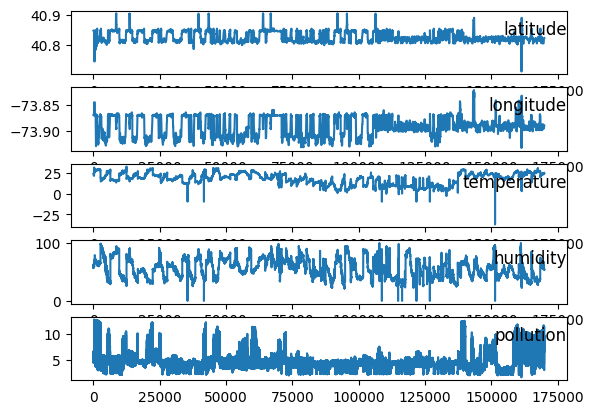

In [ ]:
from pandas import read_csv
from matplotlib import pyplot

#we are reading our new dataframe
#header=0 means that the first row contains the column names and index_col=0 means that the first column is my indexing for my dataframe
dataset=NYC_PM.drop(['geohash', 'geometry'], axis=1)

# here we want to save all numerical values from our dataframe to the numpy array. every row of the dataframe will be a row in our array
#and each column in our dataframe will be a column in our array. Interesting

values=dataset.values

#we want to plot our columns. we specify them
groups=[0,1,2,3,4]
#we are using matplotlib
i = 1
# plot each column
pyplot.figure()
for group in groups:
 pyplot.subplot(len(groups), 1, i)
 pyplot.plot(values[:, group])
 pyplot.title(dataset.columns[group], y=0.5, loc='right')
 i += 1
pyplot.show()


# correlation matrix

<font color = 'blue'> from the correlation matrix, looks like the ```temperature``` is the variable that has the highest correlation with the reponse varaible ```pollution```, at the par with 0.49, other variables are less significant</font>
- having said that, drop some of the predictors (input variables)and test the performance of your algorithms again! does the performance improves in terms of accuracy, and running time!

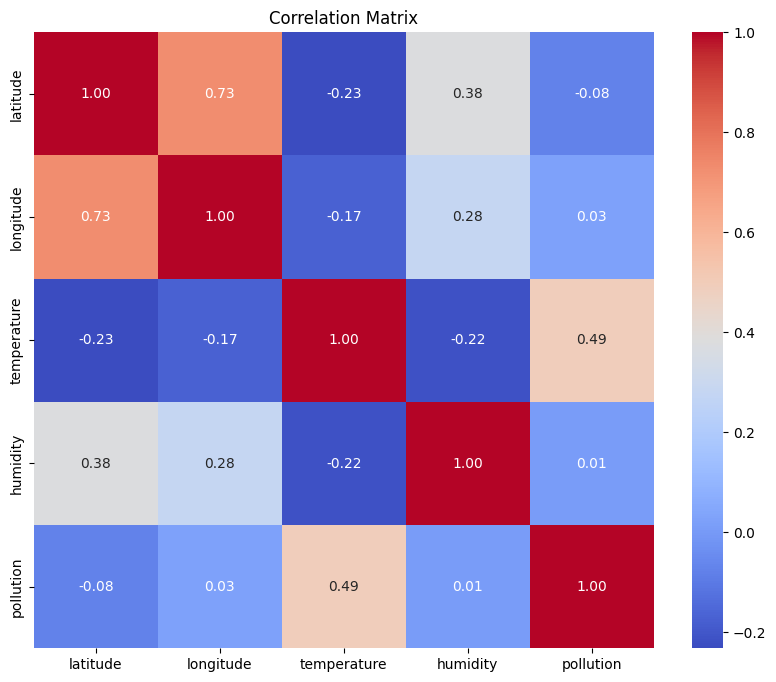

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have merged_data DataFrame

# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()


# .

In [49]:
# we want to fit the lstm (long short term memory) to our data
from pandas import DataFrame
from pandas import read_csv
from pandas import concat
#Scikit learn is a machine learning library. LabelEncoder is a class that has some methods that one of them is a transforming
#the categorical data to numerical data (fit and transform method: mylabel=LabelEncoder() mylabel.fit_transform(["cat", "dog","cat"]))
from sklearn.preprocessing import LabelEncoder
#MinMAxScaler transforms the data (for example two columns) to the number between 0 and 1  myminmax=MinMaxScaler()
#myminmax.fit_transform([[3,78],[4,34],[1,5]]) output:[[0.  0. ] [0.5 0.5] [1.  1. ]]

from sklearn.preprocessing import MinMaxScaler
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
# input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))# here cols will be a list of dataframes that each dataframe is the shifted i times down of the original dataframe, cols=[datafram after 5 times down, dataframe after 4 times doan ,..]
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    #print(names)# it shows that names is a list of strings which each one of them is a name of one column after shiftin that column
    #i time down ['var1(t-5)', 'var2(t-5)', 'var3(t-5)', 'var4(t-5)', 'var5(t-5)', 'var6(t-5)', 'var7(t-5)', 'var8(t-5)', 'var1(t-4)', 'var2(t-4)', 'var3(t-4)', 'var4(t-4)', 'var5(t-4)', 'var6(t-4)', 'var7(t-4)', 'var8(t-4)', 'var1(t-3)', 'var2(t-3)', 'var3(t-3)', 'var4(t-3)', 'var5(t-3)', 'var6(t-3)', 'var7(t-3)', 'var8(t-3)', 'var1(t-2)', 'var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var5(t-2)', 'var6(t-2)', 'var7(t-2)', 'var8(t-2)', 'var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)', 'var8(t-1)']
#series_to_supervised(dataset,n_in=5,n_out=1,dropnan=True)
 # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))# here we shift i steps all the columns backword and then we append the new dataframe to cols
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]# here we are writing var1(t),var2(t) with the nmuber of our coleumns
            #print(names)

        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            #print(names)


#series_to_supervised(dataset,n_in=2,n_out=3,dropnan=True)# information with the lag 2 and output for the next 3 days
#['var1(t-2)', 'var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var5(t-2)', 'var6(t-2)', 'var7(t-2)', 'var8(t-2)', 'var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)', 'var8(t)']
#['var1(t-2)', 'var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var5(t-2)', 'var6(t-2)', 'var7(t-2)', 'var8(t-2)', 'var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)', 'var8(t)', 'var1(t+1)', 'var2(t+1)', 'var3(t+1)', 'var4(t+1)', 'var5(t+1)', 'var6(t+1)', 'var7(t+1)', 'var8(t+1)']
#['var1(t-2)', 'var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var5(t-2)', 'var6(t-2)', 'var7(t-2)', 'var8(t-2)', 'var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)', 'var8(t)', 'var1(t+1)', 'var2(t+1)', 'var3(t+1)', 'var4(t+1)', 'var5(t+1)', 'var6(t+1)', 'var7(t+1)', 'var8(t+1)', 'var1(t+2)', 'var2(t+2)', 'var3(t+2)', 'var4(t+2)', 'var5(t+2)', 'var6(t+2)', 'var7(t+2)', 'var8(t+2)']

# put it all together
    agg = concat(cols, axis=1)# this is the last final dataframe that has all the columns with timing t-i and t+i
    agg.columns = names# naming the column names in the final dataframe
# drop rows with NaN values
    if dropnan:
          agg.dropna(inplace=True)
    return agg



In [ ]:
dataset.dtypes

latitude       float64
longitude      float64
temperature    float64
humidity       float64
pollution      float64
dtype: object

In [50]:
values = dataset.values
#The values array will be a 2D NumPy array where each row corresponds to a row in the DataFrame, and each column corresponds to a column in the DataFrame.
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])#After running this code, the original categorical values in the fifth column of the values array will be replaced with numerical representations
# ensure all data is float
values = values.astype('float32')#The line values = values.astype('float32') is converting the data type of all elements in the values array to float32.
#for h in range(5):# each element of values is a list in fact it is the raw of the original dataframe
#  print(values[h])

#[ 129.    -16.     -4.   1020.      2.      1.79    0.      0.  ]
#[ 148.    -15.     -4.   1020.      2.      2.68    0.      0.  ]
#[ 159.    -11.     -5.   1021.      2.      3.57    0.      0.  ]
#[ 1.810e+02 -7.000e+00 -5.000e+00  1.022e+03  2.000e+00  5.360e+00
 # 1.000e+00  0.000e+00]
#[ 138.     -7.     -5.   1022.      2.      6.25    2.      0.  ]

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1) # just will create the dataframe for our 8 variables at time t-1 and the dataframe for our 8 variables for time t
reframed.head()


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.705521,0.571594,0.874640,0.573,0.263095,0.705490,0.571594,0.874640,0.578,0.348422
2,0.705490,0.571594,0.874640,0.578,0.348422,0.705399,0.571228,0.874640,0.578,0.320904
3,0.705399,0.571228,0.874640,0.578,0.320904,0.705399,0.571228,0.873199,0.576,0.263095
4,0.705399,0.571228,0.873199,0.576,0.263095,0.705399,0.571228,0.873199,0.575,0.355319
5,0.705399,0.571228,0.873199,0.575,0.355319,0.705399,0.571228,0.873199,0.575,0.321828


In [51]:
      # drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)# from the outcome it needs the pullution column, so we delete the rest of the columns
print(reframed.head())
# as we can see we have 5 columns for input and one column for out put that is only our pollution

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)
1   0.705521   0.571594   0.874640      0.573   0.263095  0.705490
2   0.705490   0.571594   0.874640      0.578   0.348422  0.705399
3   0.705399   0.571228   0.874640      0.578   0.320904  0.705399
4   0.705399   0.571228   0.873199      0.576   0.263095  0.705399
5   0.705399   0.571228   0.873199      0.575   0.355319  0.705399


In [52]:
# split into train and test sets
#we are taking all the values from the dataframe:reframed into a 2 Dim Numpy array that list in that array row will be one row
#Each row is represented by an inner array, and the outer array holds the entire structure.It is like a matrix
...
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
#We are preparing the train data from the first year
#[rows,columns] ==> rows~~[start:end:step] rows of first year, all columns
# but how do you know that the first n_train_hours rows in  your original dataset represents a year, it is sorted
train = values[:n_train_hours, :]

In [ ]:
len(train)

8760

In [ ]:
train

array([[0.70552063, 0.57159424, 0.87463975, 0.57299995, 0.26309544,
        0.7054901 ],
       [0.7054901 , 0.57159424, 0.87463975, 0.578     , 0.34842217,
        0.70539856],
       [0.70539856, 0.571228  , 0.87463975, 0.578     , 0.3209042 ,
        0.70539856],
       ...,
       [0.7762451 , 0.4656372 , 0.759366  , 0.8669999 , 0.1391365 ,
        0.7762451 ],
       [0.7762451 , 0.4656372 , 0.759366  , 0.8669999 , 0.17702106,
        0.7762451 ],
       [0.7762451 , 0.4656372 , 0.7608069 , 0.8669999 , 0.18601277,
        0.7760315 ]], dtype=float32)

In [53]:

#we set the rest of information as a test
test = values[n_train_hours:, :]
# split into input and outputs
#train_X: we take all the rows  for one year and all the column var1,var2,until var 8 except the last column which will
#be our output:pollutin
#train_y takes all the rows for one year and only the column -1 which is the last column:pollution
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
# we know that each row of the train _X belongs to the information of 8 variable for one day of the year. now
#we want to relate it to 1=timestep. we have 3D array the first variable is the number of rows,
#the second the timestep and the last one is the number of columns
# Reshape input data to be 3D [samples, timesteps, features]


train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print("Shape of train_X:", train_X.shape)

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Shape of train_X: (8760, 1, 5)
(8760, 1, 5) (8760,) (161238, 1, 5) (161238,)


In [57]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Epoch 1/50
274/274 - 10s - loss: 0.1313 - val_loss: 0.0210 - 10s/epoch - 37ms/step
Epoch 2/50
274/274 - 11s - loss: 0.0195 - val_loss: 0.0137 - 11s/epoch - 41ms/step
Epoch 3/50
274/274 - 8s - loss: 0.0108 - val_loss: 0.0087 - 8s/epoch - 28ms/step
Epoch 4/50
274/274 - 11s - loss: 0.0045 - val_loss: 0.0075 - 11s/epoch - 39ms/step
Epoch 5/50
274/274 - 11s - loss: 0.0038 - val_loss: 0.0068 - 11s/epoch - 39ms/step
Epoch 6/50
274/274 - 7s - loss: 0.0035 - val_loss: 0.0071 - 7s/epoch - 24ms/step
Epoch 7/50
274/274 - 8s - loss: 0.0033 - val_loss: 0.0061 - 8s/epoch - 28ms/step
Epoch 8/50
274/274 - 11s - loss: 0.0030 - val_loss: 0.0047 - 11s/epoch - 39ms/step
Epoch 9/50
274/274 - 11s - loss: 0.0029 - val_loss: 0.0053 - 11s/epoch - 39ms/step
Epoch 10/50
274/274 - 11s - loss: 0.0026 - val_loss: 0.0053 - 11s/epoch - 39ms/step
Epoch 11/50
274/274 - 7s - loss: 0.0024 - val_loss: 0.0040 - 7s/epoch - 27ms/step
Epoch 12/50
274/274 - 7s - loss: 0.0024 - val_loss: 0.0039 - 7s/epoch - 26ms/step
Epoch 13/50

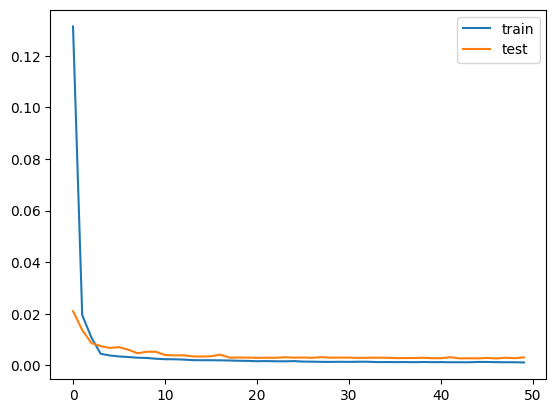

In [54]:
# design network
model = Sequential()
model.add(LSTM(4, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=True)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [58]:
# make a prediction
#making predictions (yhat) using the trained model (model) on the test data (test_X).
yhat = model.predict(test_X)
test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
#we combine the yhat with the original data from text_X and remove the first column
inv_yhat = concatenate((yhat, test_X1[:, 1:]), axis=1)
# In the past we did two scalar on the text_X taht we convert the categorical variable to numbers and we ransform all the number between 0 and 1
# now we want to inverse them and get the original data
inv_yhat = scaler.inverse_transform(inv_yhat)
#we need all the raws and the first column which is yhat
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
# we are making sure that the test_y still has len(test_y) raws and 1 column which is pollution after the first year
test_y1 = test_y.reshape((len(test_y), 1))
inv_y1 = concatenate((test_y1, test_X1[:, 1:]), axis=1)
inv_y1 = scaler.inverse_transform(inv_y1)
inv_y1 = inv_y1[:,0]

# Calculate rmse
rmse_LSTM = sqrt(mean_squared_error(inv_y1, inv_yhat))

# Calculate mse
mse_LSTM=mean_squared_error(inv_y1, inv_yhat)

# Calculate mae
mae_LSTM=mae(inv_y1, inv_yhat)

# Calculate Maximum Prediction Error
max_prediction_error_LSTM = np.max(np.abs(inv_y1 - inv_yhat))

# Calculate the number of correct predictions

total_correct_predictions_LSTM=0
K=np.zeros(len(inv_yhat))
K1=np.zeros(len(inv_yhat))

for i in range(1, len(inv_yhat)):
    if inv_yhat[i] > inv_yhat[i-1]:
        K[i]=1
    if inv_yhat[i] < inv_yhat[i-1]:
        K[i]=0
    if inv_y1[i] > inv_y1[i-1]:
        K1[i]=1
    if inv_y1[i] < inv_y1[i-1]:
        K1[i]=0
for i in range(1, len(inv_yhat)):
    if K[i]==K1[i]:
        total_correct_predictions_LSTM=total_correct_predictions_LSTM+1



# Calculate Accuracy
num_total_samples = len(inv_y1)
accuracy_LSTM = total_correct_predictions_LSTM / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_LSTM = 1 - accuracy_LSTM

# Print the results
print(f'Test RMSE: {rmse_LSTM:.3f}')
print(f'Test MSE: {mse_LSTM:.5f}')
print(f'Test MAE: {mae_LSTM:.5f}')
print(f'Maximum Prediction Error: {max_prediction_error_LSTM:.3f}')
print(f'Predict the correct number of days: {total_correct_predictions_LSTM}')
print(f'Accuracy: {accuracy_LSTM * 100:.2f}')
print(f'error rate: {error_rate_LSTM * 100:.2f}')

5039/5039 [==============================] - 10s 2ms/step
Test RMSE: 0.001
Test MSE: 0.00000
Test MAE: 0.00060
Maximum Prediction Error: 0.088
Predict the correct number of days: 113890
Accuracy: 70.63
error rate: 29.37


In [60]:
# make a prediction
#making predictions (yhat) using the trained model (model) on the test data (test_X).
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
#we combine the yhat with the original data from text_X and remove the first column
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# In the past we did two scalar on the text_X taht we convert the categorical variable to numbers and we ransform all the number between 0 and 1
# now we want to inverse them and get the original data
inv_yhat = scaler.inverse_transform(inv_yhat)
#we need all the raws and the first column which is yhat
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
# we are making sure that the test_y still has len(test_y) raws and 1 column which is pollution after the first year
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

5039/5039 [==============================] - 8s 2ms/step
Test RMSE: 0.001


In [61]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt

# Design and train SVR model
svr_model = SVR(kernel='rbf', C=100, gamma='auto')  # You may need to tune the hyperparameters
svr_model.fit(train_X.reshape((train_X.shape[0], train_X.shape[2])), train_y)

# Make predictions
# Make predictions
yhat_svr = svr_model.predict(test_X.reshape((test_X.shape[0], test_X.shape[1])))

# Reshape test_X for inverse scaling
# Reshape test_X for inverse scaling
test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[1]))

# Invert scaling for forecast
inv_yhat_svr = concatenate((yhat_svr.reshape((len(yhat_svr), 1)), test_X_reshaped[:, 1:]), axis=1)
inv_yhat_svr = scaler.inverse_transform(inv_yhat_svr)
inv_yhat_svr = inv_yhat_svr[:,0]

# Invert scaling for actual
test_y_reshaped = test_y.reshape((len(test_y), 1))
inv_y_svr = concatenate((test_y_reshaped, test_X_reshaped[:, 1:]), axis=1)
inv_y_svr = scaler.inverse_transform(inv_y_svr)
inv_y_svr = inv_y_svr[:,0]

# Calculate RMSE
rmse_svr = sqrt(mean_squared_error(inv_y_svr, inv_yhat_svr))
print('Test RMSE (SVR): %.3f' % rmse_svr)


Test RMSE (SVR): 0.009


In [62]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt

# Design and train SVR model
svr_model = SVR(kernel='rbf', C=100, gamma='auto')  # You may need to tune the hyperparameters
svr_model.fit(train_X.reshape((train_X.shape[0], train_X.shape[2])), train_y)

# Make predictions
# Make predictions
yhat_svr = svr_model.predict(test_X.reshape((test_X.shape[0], test_X.shape[1])))

# Reshape test_X for inverse scaling
# Reshape test_X for inverse scaling
test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[1]))

# Invert scaling for forecast
inv_yhat_svr = concatenate((yhat_svr.reshape((len(yhat_svr), 1)), test_X_reshaped[:, 1:]), axis=1)
inv_yhat_svr = scaler.inverse_transform(inv_yhat_svr)
inv_yhat_svr = inv_yhat_svr[:,0]

# Invert scaling for actual
test_y_reshaped = test_y.reshape((len(test_y), 1))
inv_y_svr = concatenate((test_y_reshaped, test_X_reshaped[:, 1:]), axis=1)
inv_y_svr = scaler.inverse_transform(inv_y_svr)
inv_y_svr = inv_y_svr[:,0]


# Calculate rmse
rmse_SVR = sqrt(mean_squared_error(inv_y_svr, inv_yhat_svr))

# Calculate mse
mse_SVR=mean_squared_error(inv_y_svr, inv_yhat_svr)

# Calculate mae
mae_SVR=mae(inv_y_svr, inv_yhat_svr)

# Calculate Maximum Prediction Error
max_prediction_error_SVR = np.max(np.abs(inv_y_svr - inv_yhat_svr))

# Calculate the number of correct predictions
total_correct_predictions_SVR=0
num_correct_increasing_predictions = 0
num_correct_decreasing_predictions = 0

last_val = inv_yhat_svr[0]

for i in range(1, len(inv_yhat)):
    if inv_yhat_svr[i] > last_val:
        if inv_y_svr[i] > last_val:
            num_correct_increasing_predictions += 1
    elif inv_yhat_svr[i] < last_val:
        if inv_y_svr[i] < last_val:
            num_correct_decreasing_predictions += 1
    last_val = inv_yhat_svr[i]

# Calculate Predict the correct number of days
total_correct_predictions_SVR= num_correct_increasing_predictions + num_correct_decreasing_predictions

# Calculate Accuracy
num_total_samples = len(inv_y_svr)
accuracy_SVR = total_correct_predictions_SVR  / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_SVR = 1 - accuracy_SVR

# Print the results
print(f'Test RMSE: {rmse_SVR:.3f}')
print(f'Test MSE: {mse_SVR:.5f}')
print(f'Test MAE: {mae_SVR:.5f}')
print(f'Maximum Prediction Error: {max_prediction_error_SVR:.3f}')
print(f'Predict the correct number of days: {total_correct_predictions_SVR}')
print(f'Accuracy: {accuracy_SVR * 100:.2f}')
print(f'error rate: {error_rate_SVR * 100:.2f}')


Test RMSE: 0.009
Test MSE: 0.00008
Test MAE: 0.00722
Maximum Prediction Error: 0.060
Predict the correct number of days: 80691
Accuracy: 50.04
error rate: 49.96


In [63]:
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
#train_X: we take all the rows for one year and all the column var1,var2,until var 8 except the last column which will
#be our output:pollution
#train_y takes all the rows for one year and only the column -1 which is the last column: pollution
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [64]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(train_X, train_y)

In [65]:
yhat = lr.predict(test_X)
# invert scaling for forecast

rmse = sqrt(mean_squared_error(yhat, test_y))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.004


In [67]:

# Make predictions
# Make predictions
yhat_lr = yhat

# Reshape test_X for inverse scaling
# Reshape test_X for inverse scaling
test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[1]))

# Invert scaling for forecast
inv_yhat_lr = concatenate((yhat_lr.reshape((len(yhat_lr), 1)), test_X_reshaped[:, 1:]), axis=1)
inv_yhat_lr = scaler.inverse_transform(inv_yhat_lr)
inv_yhat_lr = inv_yhat_lr[:,0]

# Invert scaling for actual
test_y_reshaped = test_y.reshape((len(test_y), 1))
inv_y_lr = concatenate((test_y_reshaped, test_X_reshaped[:, 1:]), axis=1)
inv_y_lr = scaler.inverse_transform(inv_y_lr)
inv_y_lr = inv_y_lr[:,0]


# Calculate rmse
rmse_lr = rmse

# Calculate mse
mse_lr = mean_squared_error(inv_y_lr, inv_yhat_lr)

# Calculate mae
mae_lr = mae(inv_y_lr, inv_yhat_lr)

# Calculate Maximum Prediction Error
max_prediction_error_lr = np.max(np.abs(inv_y_lr - inv_yhat_lr))

# Calculate the number of correct predictions
total_correct_predictions_lr=0
num_correct_increasing_predictions = 0
num_correct_decreasing_predictions = 0

last_val = inv_yhat_lr[0]

for i in range(1, len(yhat)):
    if inv_yhat_lr[i] > last_val:
        if inv_y_lr[i] > last_val:
            num_correct_increasing_predictions += 1
    elif inv_yhat_lr[i] < last_val:
        if inv_y_lr[i] < last_val:
            num_correct_decreasing_predictions += 1
    last_val = inv_yhat_lr[i]

# Calculate Predict the correct number of days
total_correct_predictions_lr= num_correct_increasing_predictions + num_correct_decreasing_predictions

# Calculate Accuracy
num_total_samples = len(inv_y_lr)
accuracy_lr = total_correct_predictions_lr  / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_lr = 1 - accuracy_lr


In [68]:
from keras.layers import SimpleRNN

In [69]:
train_X.shape

(8760, 5)

In [70]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

Epoch 1/50
274/274 - 13s - loss: 0.2281 - val_loss: 0.0994 - 13s/epoch - 46ms/step
Epoch 2/50
274/274 - 11s - loss: 0.0864 - val_loss: 0.0339 - 11s/epoch - 40ms/step
Epoch 3/50
274/274 - 9s - loss: 0.0307 - val_loss: 0.0155 - 9s/epoch - 32ms/step
Epoch 4/50
274/274 - 6s - loss: 0.0171 - val_loss: 0.0159 - 6s/epoch - 23ms/step
Epoch 5/50
274/274 - 11s - loss: 0.0118 - val_loss: 0.0109 - 11s/epoch - 39ms/step
Epoch 6/50
274/274 - 11s - loss: 0.0066 - val_loss: 0.0105 - 11s/epoch - 39ms/step
Epoch 7/50
274/274 - 11s - loss: 0.0048 - val_loss: 0.0078 - 11s/epoch - 39ms/step
Epoch 8/50
274/274 - 11s - loss: 0.0042 - val_loss: 0.0069 - 11s/epoch - 40ms/step
Epoch 9/50
274/274 - 7s - loss: 0.0039 - val_loss: 0.0064 - 7s/epoch - 27ms/step
Epoch 10/50
274/274 - 6s - loss: 0.0035 - val_loss: 0.0054 - 6s/epoch - 23ms/step
Epoch 11/50
274/274 - 11s - loss: 0.0033 - val_loss: 0.0039 - 11s/epoch - 39ms/step
Epoch 12/50
274/274 - 7s - loss: 0.0031 - val_loss: 0.0035 - 7s/epoch - 27ms/step
Epoch 13/50

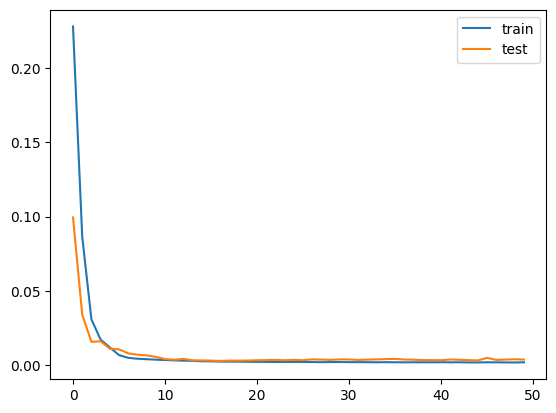

In [71]:
model = Sequential()
model.add(SimpleRNN(4, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history =model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=True)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [72]:
from sklearn.metrics import mean_absolute_error as mae
# make a prediction
#making predictions (yhat) using the trained model (model) on the test data (test_X).
yhat = model.predict(test_X)
test_X2 = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
#we combine the yhat with the original data from text_X and remove the first column
inv_yhat = concatenate((yhat, test_X2[:, 1:]), axis=1)
# In the past we did two scalar on the text_X taht we convert the categorical variable to numbers and we ransform all the number between 0 and 1
# now we want to inverse them and get the original data
inv_yhat = scaler.inverse_transform(inv_yhat)
#we need all the raws and the first column which is yhat
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
# we are making sure that the test_y still has len(test_y) raws and 1 column which is pollution after the first year
test_y2 = test_y.reshape((len(test_y), 1))
inv_y2 = concatenate((test_y2, test_X2[:, 1:]), axis=1)
inv_y2 = scaler.inverse_transform(inv_y2)
inv_y2 = inv_y2[:,0]

# Calculate rmse
rmse_SimpleRNN = sqrt(mean_squared_error(inv_y2, inv_yhat))

# Calculate mse
mse_SimpleRNN=mean_squared_error(inv_y2, inv_yhat)

# Calculate mae
mae_SimpleRNN=mae(inv_y2, inv_yhat)

# Calculate Maximum Prediction Error
max_prediction_error_SimpleRNN = np.max(np.abs(inv_y2 - inv_yhat))

# Calculate the number of correct predictions

total_correct_predictions_SimpleRNN=0
K=np.zeros(len(inv_yhat))
K1=np.zeros(len(inv_yhat))

for i in range(1, len(inv_yhat)):
    if inv_yhat[i] > inv_yhat[i-1]:
        K[i]=1
    if inv_yhat[i] < inv_yhat[i-1]:
        K[i]=0
    if inv_y2[i] > inv_y2[i-1]:
        K1[i]=1
    if inv_y2[i] < inv_y2[i-1]:
        K1[i]=0
for i in range(1, len(inv_yhat)):
    if K[i]==K1[i]:
        total_correct_predictions_SimpleRNN=total_correct_predictions_SimpleRNN+1



# Calculate Accuracy
num_total_samples = len(inv_y2)
accuracy_SimpleRNN = total_correct_predictions_SimpleRNN  / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_SimpleRNN = 1 - accuracy_SimpleRNN

# Print the results
print(f'Test RMSE: {rmse_SimpleRNN:.3f}')
print(f'Test MSE: {mse_SimpleRNN:.5f}')
print(f'Test MAE: {mae_SimpleRNN:.5f}')
print(f'Maximum Prediction Error: {max_prediction_error_SimpleRNN:.3f}')
print(f'Predict the correct number of days: {total_correct_predictions_SimpleRNN}')
print(f'Accuracy: {accuracy_SimpleRNN * 100:.2f}')
print(f'error rate: {error_rate_SimpleRNN * 100:.2f}')

5039/5039 [==============================] - 10s 2ms/step
Test RMSE: 0.001
Test MSE: 0.00000
Test MAE: 0.00069
Maximum Prediction Error: 0.097
Predict the correct number of days: 108619
Accuracy: 67.37
error rate: 32.63


In [73]:
# make a prediction
#making predictions (yhat) using the trained model (model) on the test data (test_X).
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
#we combine the yhat with the original data from text_X and remove the first column
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# In the past we did two scalar on the text_X taht we convert the categorical variable to numbers and we ransform all the number between 0 and 1
# now we want to inverse them and get the original data
inv_yhat = scaler.inverse_transform(inv_yhat)
#we need all the raws and the first column which is yhat
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
# we are making sure that the test_y still has len(test_y) raws and 1 column which is pollution after the first year
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

5039/5039 [==============================] - 10s 2ms/step
Test RMSE: 0.001


In [25]:
dataset = merged_data[['latitude', 'longitude', 'temperature', 'humidity', 'pollution']]

In [26]:
TRAIN_SPLIT=int(len(dataset)*0.8)

In [27]:
TRAIN_SPLIT

136000

In [28]:
dataset=np.array(dataset)

In [29]:
def multivariate_data(dataset,target,start_index,end_index,history_size,
                      target_size,step,single_step=False):
    data=[]
    labels=[]

    start_index=start_index+history_size
    if end_index is None:
       end_index=len(dataset)-target_size

    for i in range(start_index, end_index):
       indices=range(i-history_size,i,step)
       data.append(dataset[indices])

       if single_step:
           labels.append(target[i+target_size])
       else:
           labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [30]:
past_history=16
STEP=1
n_step=3

x_train_multi, y_train_multi=multivariate_data(dataset,dataset[:,4],0,TRAIN_SPLIT,past_history,n_step,STEP,single_step=False)
x_test_multi, y_test_multi=multivariate_data(dataset,dataset[:,4],TRAIN_SPLIT,None,past_history,n_step,STEP,single_step=False)

In [33]:
scalers={}
for i in range(x_train_multi.shape[1]):
      scalers [i]=MinMaxScaler(feature_range=(0,1))
      x_train_multi[:,i,:]=scalers[i].fit_transform(x_train_multi[:,i,:])
for i in range(x_test_multi.shape[1]):
      x_test_multi[:,i,:]=scalers[i].fit_transform(x_test_multi[:,i,:])

In [34]:
scaler_y=MinMaxScaler(feature_range=(0,1))
y_train_multi=scaler_y.fit_transform(y_train_multi)
y_test_multi=scaler_y.fit_transform(y_test_multi)

In [35]:
x_train_multi_2d=x_train_multi.reshape(x_train_multi.shape[0], x_train_multi.shape[1]*x_train_multi.shape[2])
x_test_multi_2d=x_test_multi.reshape(x_test_multi.shape[0], x_test_multi.shape[1]*x_test_multi.shape[2])

In [45]:
MLP_model=Sequential()
MLP_model.add(Dense(50,activation='relu', input_dim=x_train_multi_2d.shape[1]))
MLP_model.add(Dense(1, activation='relu'))

MLP_model.add(Dense(n_step, activation='selu'))
MLP_model.compile(optimizer='adam',loss='mse')
MLP_model.compile(optimizer='adam',loss='mae')

In [46]:
history_MLP=MLP_model.fit(x_train_multi_2d,y_train_multi,epochs=100,batch_size=72,validation_data=(x_test_multi_2d,y_test_multi))

Epoch 1/100
1889/1889 [==============================] - 8s 3ms/step - loss: 0.1050 - val_loss: 0.1623
Epoch 2/100
1889/1889 [==============================] - 5s 2ms/step - loss: 0.1006 - val_loss: 0.1633
Epoch 3/100
1889/1889 [==============================] - 5s 2ms/step - loss: 0.1006 - val_loss: 0.1613
Epoch 4/100
1889/1889 [==============================] - 5s 3ms/step - loss: 0.1006 - val_loss: 0.1613
Epoch 5/100
1889/1889 [==============================] - 4s 2ms/step - loss: 0.1006 - val_loss: 0.1628
Epoch 6/100
1889/1889 [==============================] - 5s 2ms/step - loss: 0.1006 - val_loss: 0.1636
Epoch 7/100
1889/1889 [==============================] - 4s 2ms/step - loss: 0.1006 - val_loss: 0.1633
Epoch 8/100
1889/1889 [==============================] - 4s 2ms/step - loss: 0.1006 - val_loss: 0.1619
Epoch 9/100
1889/1889 [==============================] - 4s 2ms/step - loss: 0.1006 - val_loss: 0.1627
Epoch 10/100
1889/1889 [==============================] - 5s 3ms/step - l

In [55]:
y_train_M_MLP=MLP_model.predict(x_train_multi_2d)

4250/4250 [==============================] - 6s 1ms/step


In [74]:
y_train_M_MLP_inv=scaler_y.inverse_transform(y_train_M_MLP)
y_train_multi_inv=scaler_y.inverse_transform(y_train_multi)

In [75]:
predict_MLP=MLP_model.predict(x_test_multi_2d)

1062/1062 [==============================] - 1s 1ms/step


In [76]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error as mse

# Calculate rmse
rmse_MLP = sqrt(mse(y_test_multi, predict_MLP))

# Calculate mse
mse_MLP = mse(y_test_multi, predict_MLP)

# Calculate mae
mae_MLP = mae(y_test_multi, predict_MLP)

# Calculate Maximum Prediction Error
max_prediction_error_MLP = np.max(np.abs(y_test_multi - predict_MLP))

# Calculate the number of correct predictions
predict_MLPp=predict_MLP[:,2]
y_test_multii=y_test_multi[:,2]
total_correct_predictions_MLP=0
K=np.zeros(len(predict_MLPp))
K1=np.zeros(len(predict_MLPp))

for i in range(1, len(predict_MLPp)):
    if predict_MLPp[i] > predict_MLPp[i-1]:
        K[i]=1
    if predict_MLPp[i] < predict_MLPp[i-1]:
        K[i]=0
    if y_test_multii[i] > y_test_multii[i-1]:
        K1[i]=1
    if y_test_multii[i] < y_test_multii[i-1]:
        K1[i]=0
for i in range(1, len(predict_MLPp)):
    if K[i]==K1[i]:
        total_correct_predictions_MLP=total_correct_predictions_MLP+1

# Calculate Accuracy
num_total_samples = len(predict_MLPp)
accuracy_MLP = total_correct_predictions_MLP  / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_MLP = 1 - accuracy_MLP

# Print the results
print(f'Test RMSE: {rmse_MLP:.3f}')
print(f'Test MSE: {mse_MLP:.5f}')
print(f'Test MAE: {mae_MLP:.5f}')
print(f'Maximum Prediction Error: {max_prediction_error_MLP:.3f}')
print(f'Predict the correct number of days: {total_correct_predictions_MLP}')
print(f'Accuracy: {accuracy_MLP * 100:.2f}')
print(f'error rate: {error_rate_MLP * 100:.2f}')

Test RMSE: 0.236
Test MSE: 0.05552
Test MAE: 0.16276
Maximum Prediction Error: 0.793
Predict the correct number of days: 20014
Accuracy: 58.90
error rate: 41.10


<font color='red'> results: accuracy-based and time-based</font>
use other metrics to calculate the accuracy
- **Evaluation Metrics**: Use appropriate evaluation metrics to quantify the performance of each model. For regression tasks like predicting pollution levels, common metrics include:
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)
  - Root Mean Squared Error (RMSE)
  - R-squared (R^2) coefficient of determination
- also, similar to the method used in the paper, consider **"The correct number of days predicted by LSTM-based method as opposed to the other methods"**
  - check the paper titled **"Air quality prediction using CT-LSTM"** in the attached literature!

- you specificlly need to draw performance graphs similar to the following:

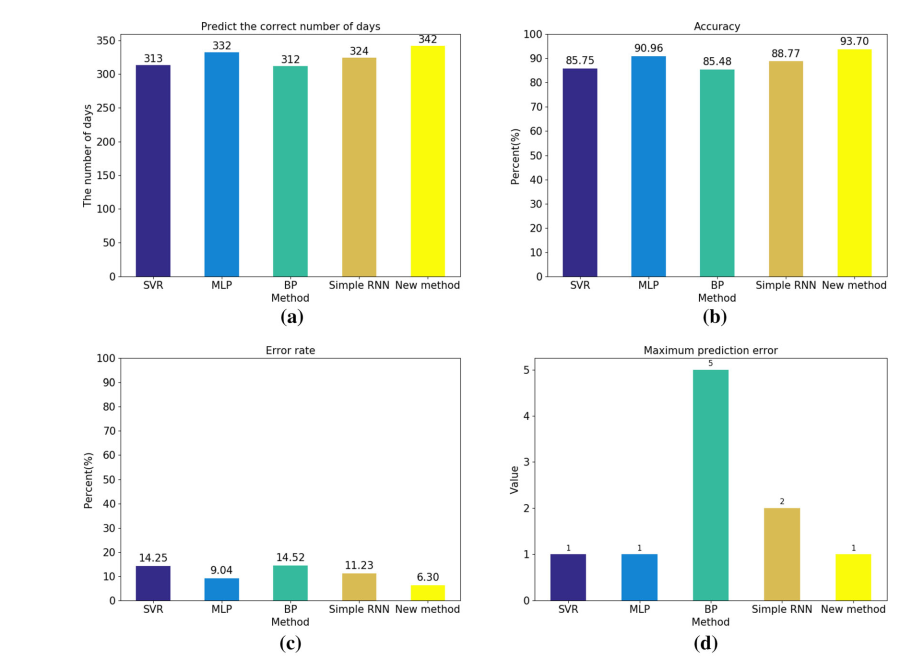

and the following

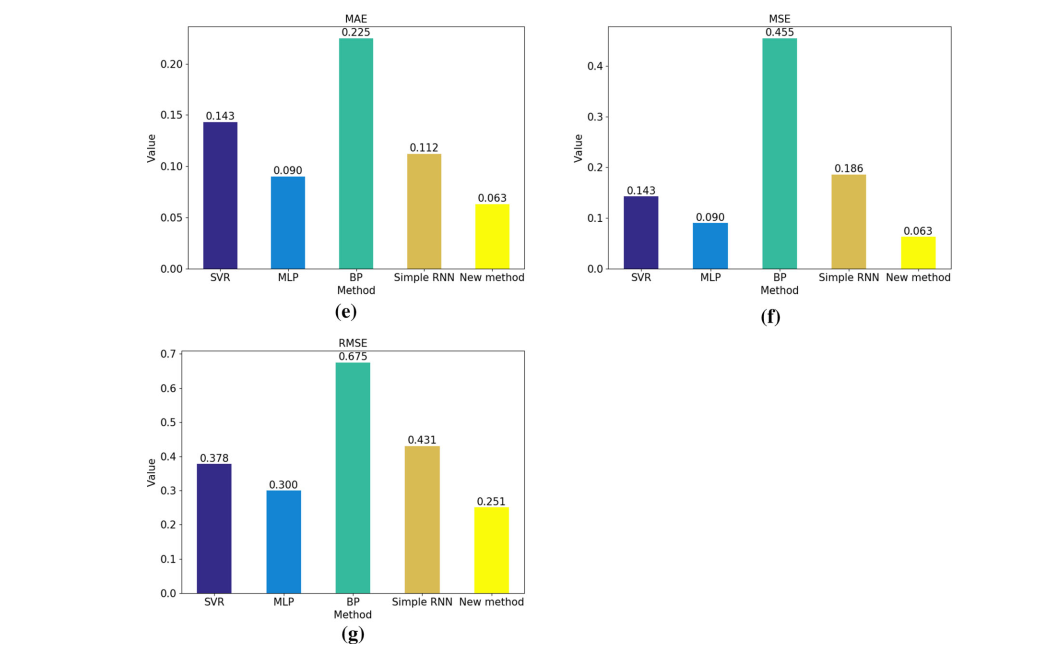

<font color='red'> the following figure is not clear, change x-axis (time) to something more visible and interpretable. For example, hour, day, week, etc.</font>

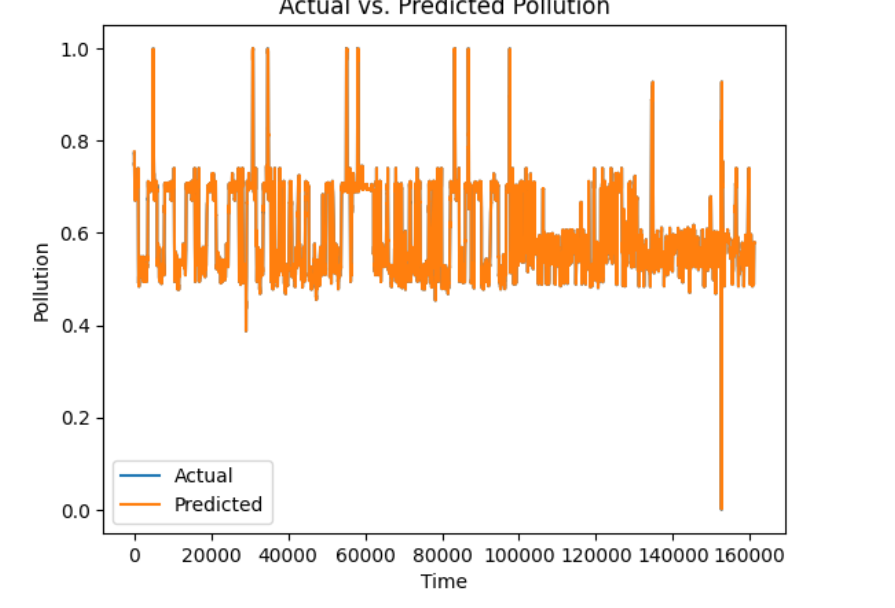

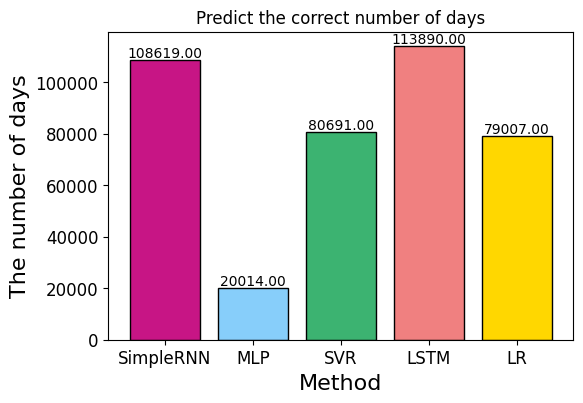

In [79]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN','MLP', 'SVR', 'LSTM', 'LR']
y = [total_correct_predictions_SimpleRNN, total_correct_predictions_MLP, total_correct_predictions_SVR, total_correct_predictions_LSTM, total_correct_predictions_lr]

width = 0.2
colors = ['mediumvioletred','lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('The number of days', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Predict the correct number of days")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

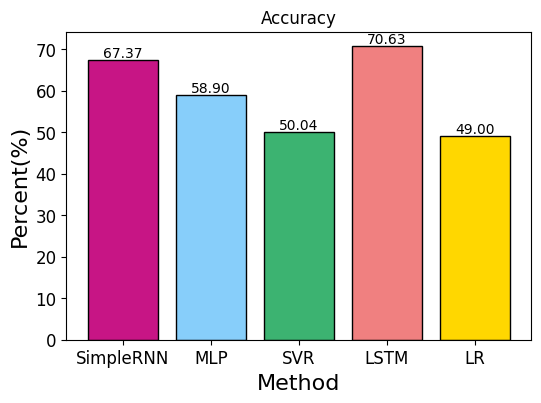

In [80]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN','MLP', 'SVR', 'LSTM', 'LR']
y = [accuracy_SimpleRNN*100, accuracy_MLP*100, accuracy_SVR*100, accuracy_LSTM*100, accuracy_lr*100]

width = 0.2
colors = ['mediumvioletred','lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Percent(%)', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Accuracy")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

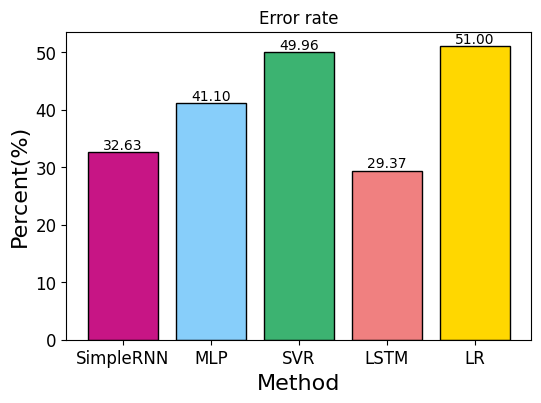

In [81]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN','MLP', 'SVR', 'LSTM', 'LR']
y = [error_rate_SimpleRNN*100, error_rate_MLP*100, error_rate_SVR*100, error_rate_LSTM*100, error_rate_lr*100]

width = 0.2
colors = ['mediumvioletred','lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6, 4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Percent(%)', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Error rate")

for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')

plt.show()

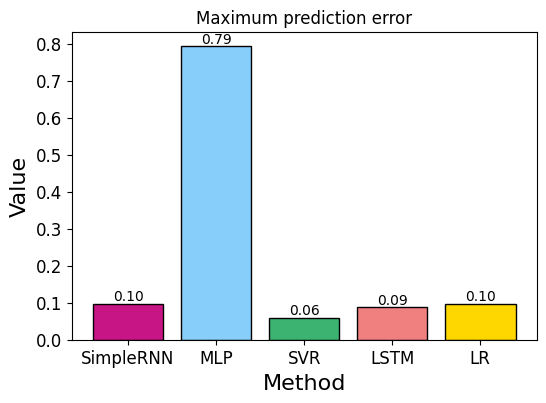

In [82]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN', 'MLP', 'SVR', 'LSTM', 'LR']
y = [max_prediction_error_SimpleRNN, max_prediction_error_MLP, max_prediction_error_SVR, max_prediction_error_LSTM, max_prediction_error_lr]

width = 0.2
colors = ['mediumvioletred', 'lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Maximum prediction error")

for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

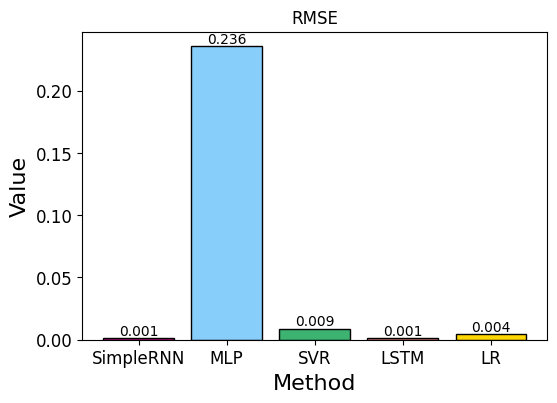

In [83]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN','MLP', 'SVR', 'LSTM', 'LR']
y = [rmse_SimpleRNN, rmse_MLP, rmse_SVR, rmse_LSTM, rmse_lr]

width = 0.2
colors = ['mediumvioletred', 'lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("RMSE")

for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.3f}', ha='center', va='bottom')


plt.show()

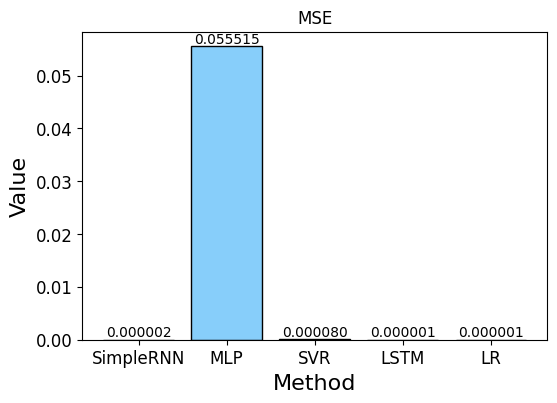

In [84]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN', 'MLP', 'SVR', 'LSTM', 'LR']
y = [mse_SimpleRNN, mse_MLP, mse_SVR, mse_LSTM, mse_lr]

width = 0.2
colors = ['mediumvioletred', 'lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("MSE")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.6f}', ha='center', va='bottom')


plt.show()

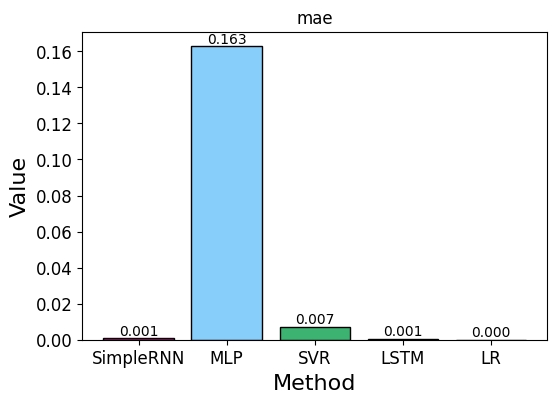

In [85]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN', 'MLP', 'SVR', 'LSTM', 'LR']
y = [mae_SimpleRNN, mae_MLP, mae_SVR, mae_LSTM, mae_lr]

width = 0.2
colors = ['mediumvioletred', 'lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("mae")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.3f}', ha='center', va='bottom')

plt.show()